**Project Birlutiu Claudiu-Andrei - merge conflicts prediction**
*We focus on :
    number of changed files
    number of commits 
    number of developers which are active in each branch 
    the average length of the commit messages 
    the number of lines added 
    the number of lines deleted
    the number od files changed simultaneously in both branches
    Set to predict
        simple set: nb of changed files, commits, devlopers, lines added and lines deletetd for both branches
        extended set: includes all features from simple set + the number of simultaneously changed filed*
       


# Setup

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

In [2]:
import numpy as np
print(np.__version__) #print numpy version, e.g., 1.21.5

1.22.4


In [3]:
pip install --upgrade numpy

Note: you may need to restart the kernel to use updated packages.


In [20]:
#pentru salvarea figurilor sia a imaginalior rezultate
import os

# to make this notebook's output stable across runs
np.random.seed(42)

#pentru salvarea figurilor/ chart-urilor
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "merge_conflicts_figure"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images_merge_conflicts", CHAPTER_ID)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print(f"Saving figure {fig_id}")
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Import data from csv file

In [5]:
import pandas
print(pandas.__version__)


1.4.2


In [6]:
pip install --upgrade pandas

Note: you may need to restart the kernel to use updated packages.


In [7]:
MERGE_CONFLICTS_PATH = os.path.join('merge_datasets', 'merge_conflicts_data', 'MergeConflictsDataset.csv')
def load_from_csv_file(csv_path=MERGE_CONFLICTS_PATH):
    return pandas.read_csv(csv_path)
    

In [16]:
merge_conflicts = load_from_csv_file()
merge_conflicts.head(10)

,commit,parent1,parent2,ancestor,is pr,added lines,deleted lines,devs parent1,devs parent2,time,...,add,remove,use,delete,change,messages_min,messages_max,messages_mean,messages_median,conflict
0,efc0bcd1d6199448c323549fdc45310750b48c85,fb9f2a65cabba5a924b89a45793914066471b2ab,5ee7c7c750e9ecffaea12f97d5b05b2445e7c007,fb9f2a65cabba5a924b89a45793914066471b2ab,1,5,0,0,1,23,...,0,0,0,0,0,20,65,35.400000,20.0,0
1,287b9b838b6b6b212ef538aa537aef76110ee111,72fd7d81c9c7e28af8740f5a1b210a803290383d,fb9f2a65cabba5a924b89a45793914066471b2ab,a18c1088c892f1e6ed4b7d541e68b2e4b039a42e,0,1166,11267,1,2,371,...,0,0,0,0,0,31,117,58.563830,53.5,1
2,e7478680c0db825239ea9628967728c8577bb5c2,36977963caa2896ad9a4a92b2bdcd85189beccb1,bc230857adc3a9763bc7d89793d826463c857c00,36977963caa2896ad9a4a92b2bdcd85189beccb1,1,0,0,0,1,22,...,0,0,0,0,0,18,18,18.000000,18.0,0
3,0c65b30a8fd3a7db40163fcb9b0004cb7487c0ff,419e6d2d9fb91f2d9cdbdd1161a6c7ecc329363f,877c43f8242b88447d0234400c6e9b5c7586b558,fe29962932a8e34f0c3ac5cd795cd40090c9fabd,1,0,0,2,1,24,...,0,0,0,0,0,22,63,38.800000,31.0,0
4,419e6d2d9fb91f2d9cdbdd1161a6c7ecc329363f,7899f565d3461ed287e61662c8d399aafcac9e42,5e68e04e310c4f57a19d4cfa6be1e0ba3a8801d6,236b85af833398e0f07d08b7d7a25734d8c1b11d,0,0,0,1,2,2,...,0,0,0,0,0,31,56,43.500000,43.5,1
5,5e68e04e310c4f57a19d4cfa6be1e0ba3a8801d6,236b85af833398e0f07d08b7d7a25734d8c1b11d,fe463db016c4b34d66c742165fc89d702be575b9,fe29962932a8e34f0c3ac5cd795cd40090c9fabd,1,0,0,1,1,24,...,0,0,0,0,0,31,31,31.000000,31.0,0
6,f8ca5065f2fc5cfc91519de3b20446d91ec0d39c,7e61fc136050be2e5057f615541c0efba38deb07,5ee46715edf40e115fbfbdafd4bc8a8b51c11bb1,f5ad47b47074b437e5b50d10c277679fcd765ab9,0,0,0,1,1,286,...,0,0,0,0,0,22,22,22.000000,22.0,0
7,72fd7d81c9c7e28af8740f5a1b210a803290383d,5b8e52ff69f338c9749ab871e1569e3292310f15,a18c1088c892f1e6ed4b7d541e68b2e4b039a42e,d9b2ac5d01163ca45b84ead150a6119e26ee0593,0,0,0,1,1,126,...,0,0,0,0,0,54,54,54.000000,54.0,0
8,f80486b832b493832b1f2df38614928911d41b1d,65db38d6222bb2961916c11360db32ab3ace3576,a18c1088c892f1e6ed4b7d541e68b2e4b039a42e,65db38d6222bb2961916c11360db32ab3ace3576,1,0,0,0,2,14,...,1,0,0,0,0,34,36,35.000000,35.0,0
9,af577a42e0e5686dc9393fc9f97d95703e966de1,0d92bec79ad16347c7fa844e40c2fb8420f4efb5,b6c7625c6fb39656d49558672355841eea9d5b65,1392056d73b28a15a17e2937df4129d09fc24e07,1,1,1,7,1,3814,...,2,0,0,0,1,24,84,38.456522,30.0,0


In [9]:
merge_conflicts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26988 entries, 0 to 26987
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   commit           26988 non-null  object 
 1   parent1          26988 non-null  object 
 2   parent2          26988 non-null  object 
 3   ancestor         26987 non-null  object 
 4   is pr            26988 non-null  int64  
 5   added lines      26988 non-null  int64  
 6   deleted lines    26988 non-null  int64  
 7   devs parent1     26988 non-null  int64  
 8   devs parent2     26988 non-null  int64  
 9   time             26988 non-null  int64  
 10  nr files         26988 non-null  int64  
 11  added files      26988 non-null  int64  
 12  deleted files    26988 non-null  int64  
 13  renamed files    26988 non-null  int64  
 14  copied files     26988 non-null  int64  
 15  modified files   26988 non-null  int64  
 16  nr commits1      26988 non-null  int64  
 17  nr commits2 

In [14]:
merge_conflicts['parent2'].value_counts()

ff92254fcbe097f603fa48b7c8df3eb6a7e84b45    5
a79a63390bc963e5924021086744e53585566307    4
589a82256759018a7e5e289302898dae32544949    4
855ed1baf11cf73245c3a39d8c13bd195d87ce44    3
99cdd12bf7181179b1aa2d3a5cbc8a3649f59f47    3
                                           ..
90c85d3e143a888c59ed76fcffb8a5a6ed28fb8d    1
b75a435942c30cbfa69a3c49cb85778b8050cb9c    1
ea55ddc1f76ba3d5a3eff373527e2a507119b7c5    1
bc201ae8db72224bc66f5fc3f103d5f67fb4312a    1
b1a1b23b94d86205eed84ad6bf643ed737d0bf2e    1
Name: parent2, Length: 26737, dtype: int64

In [15]:
#vizualizare date in functie de fiecare coloana
merge_conflicts.describe()

,is pr,added lines,deleted lines,devs parent1,devs parent2,time,nr files,added files,deleted files,renamed files,...,add,remove,use,delete,change,messages_min,messages_max,messages_mean,messages_median,conflict
count,26988.000000,2.698800e+04,2.698800e+04,26988.000000,26988.000000,26988.000000,26988.000000,26988.000000,26988.000000,26988.000000,...,26988.000000,26988.000000,26988.000000,26988.000000,26988.000000,26988.000000,26988.000000,26988.000000,26988.000000,26988.000000
mean,0.777827,4.253755e+02,2.502937e+02,4.654254,1.911368,240.794501,0.751704,2.430006,1.395768,0.969690,...,4.314177,0.954980,1.338187,0.096228,1.007411,51.388024,104.634023,69.444945,68.011653,0.054432
std,0.415714,8.885240e+03,1.027630e+04,12.227462,6.532536,908.246361,10.617551,67.821839,90.589096,64.227302,...,12.921030,3.202485,4.268581,0.541770,6.031895,34.555932,89.457205,40.054486,39.381905,0.226872
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000e+00,1.000000e+00,0.000000,1.000000,9.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000,47.000000,41.000000,40.000000,0.000000
50%,1.000000,1.100000e+01,2.000000e+00,1.000000,1.000000,36.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,46.000000,88.000000,66.333333,65.000000,0.000000
75%,1.000000,7.500000e+01,1.500000e+01,3.000000,1.000000,139.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,0.000000,1.000000,0.000000,0.000000,67.000000,131.000000,91.689744,90.000000,0.000000
max,1.000000,1.140945e+06,1.140456e+06,158.000000,182.000000,21513.000000,1152.000000,10404.000000,10396.000000,10398.000000,...,176.000000,48.000000,78.000000,16.000000,312.000000,1326.000000,1326.000000,1326.000000,1326.000000,1.000000


Saving figure attribute_plots


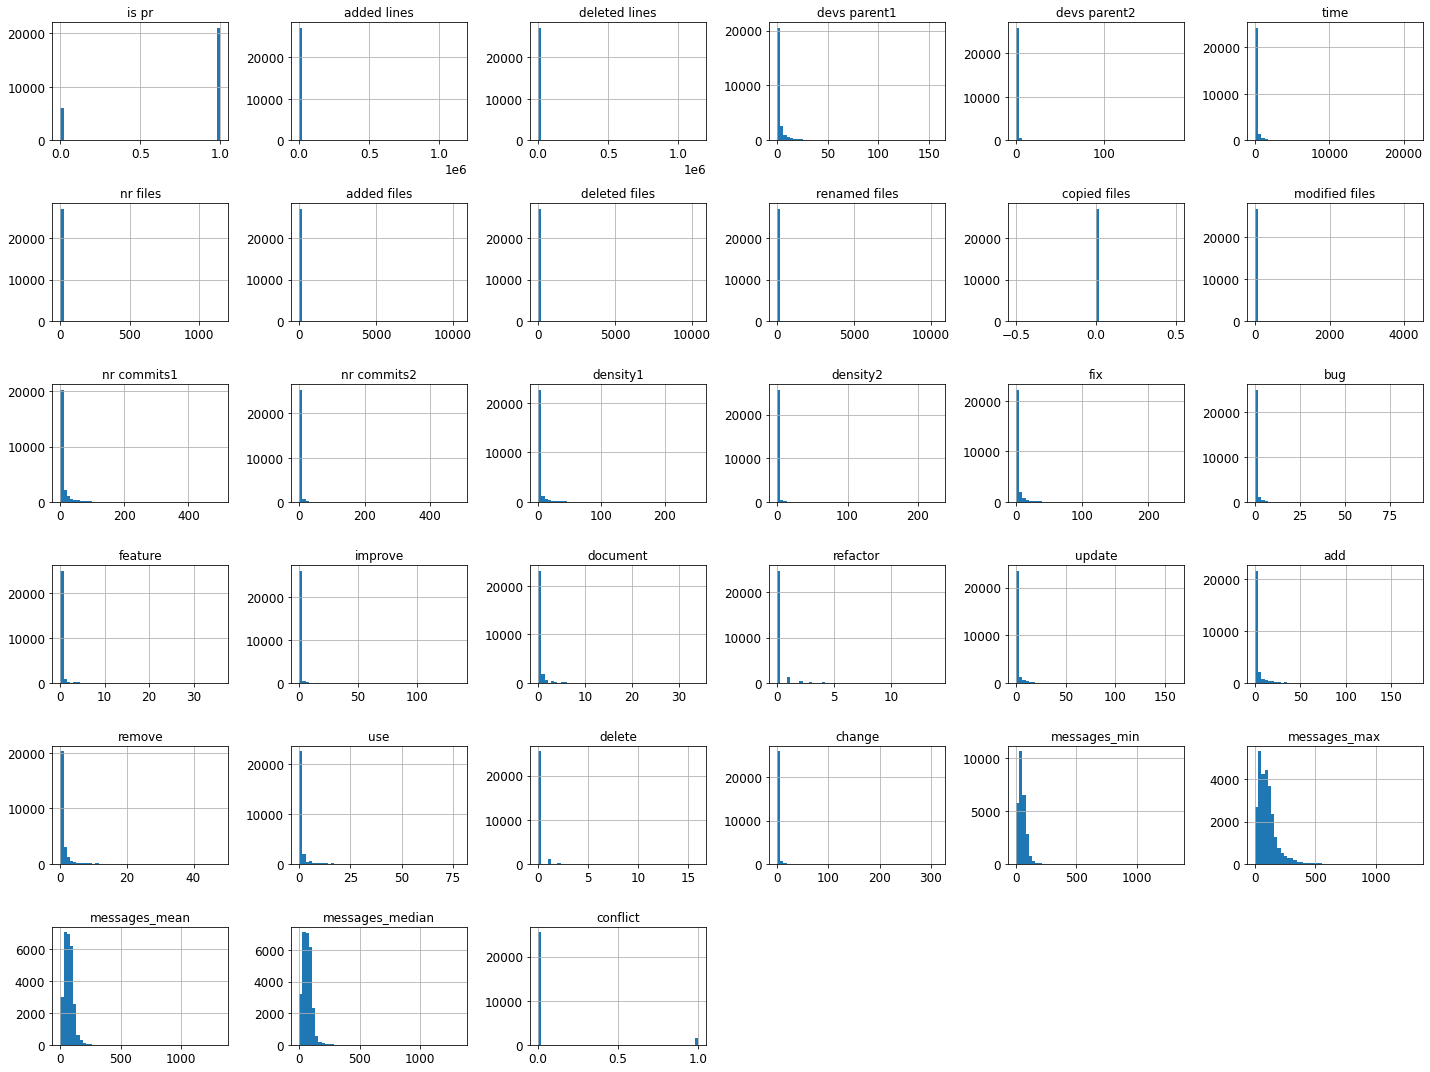

In [29]:
%matplotlib inline
merge_conflicts.hist(bins=50, figsize=(20,15))
save_fig("attribute_plots")
plt.show()

In [25]:
merge_conflicts['added lines'].head(10)

0       5
1    1166
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       1
Name: added lines, dtype: int64

In [30]:
#pentru  a face acest notebook identic la fiecare run 
np.random.seed(42)

In [ ]:
import numpy as np
#in continuare se returneaza un dictionar cu set-urile: acesta contine 80% din totalul de date pentru training si 20% pentru test
def split_dataset_train_test(data_set, train_ratio=0.8):
    #se amesteca datele pentru a alege random valori din dataset-ul dat ca input
    shuflled = 
    